# Obesity Dataset Analysis Part 2

In [7]:
import pandas as pd

file_path_csv = 'ObesityDataSet_raw_and_data_sinthetic.csv'
obesity_data = pd.read_csv(file_path_csv)

obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
# check for missing values
missing_values = obesity_data.isnull().sum()
data_description = obesity_data.describe(include='all')
missing_values, data_description.T


(Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 NObeyesdad                        0
 dtype: int64,
                                  count unique                    top  freq  \
 Gender                            2111      2                   Male  1068   
 Age                             2111.0    NaN                    NaN   NaN   
 Height                          2111.0    NaN                    NaN   NaN   
 Weight                          2111.0 

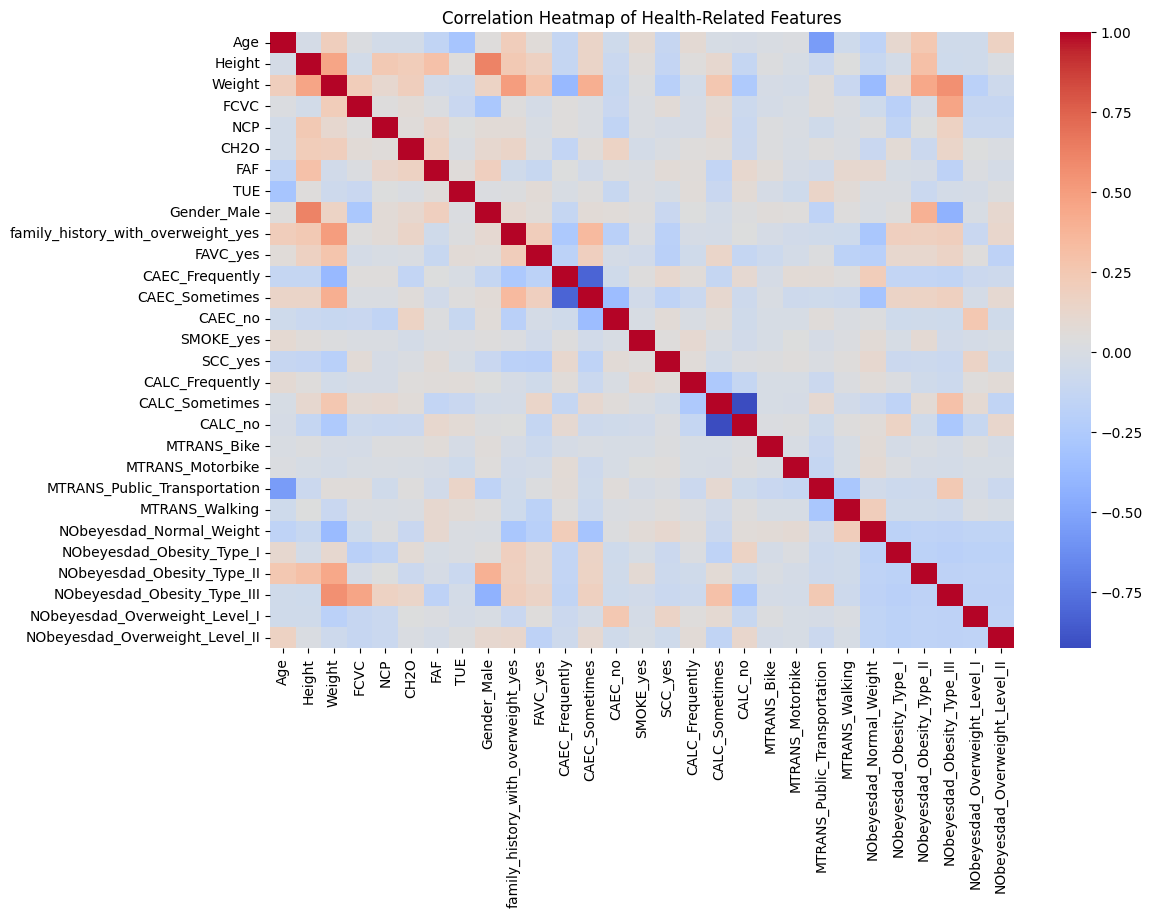

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

obesity_data_encoded = pd.get_dummies(obesity_data, columns=[
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'
], drop_first=True)

correlation_matrix = obesity_data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Health-Related Features')
plt.show()


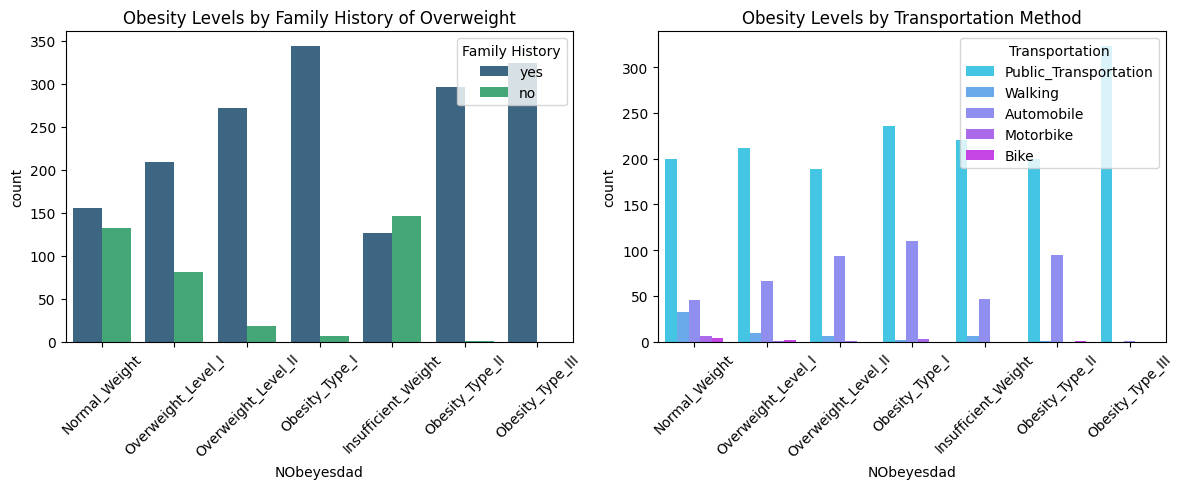

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=obesity_data, x='NObeyesdad', hue='family_history_with_overweight', palette='viridis')
plt.title('Obesity Levels by Family History of Overweight')
plt.xticks(rotation=45)
plt.legend(title="Family History", loc='upper right')

plt.subplot(1, 2, 2)
sns.countplot(data=obesity_data, x='NObeyesdad', hue='MTRANS', palette='cool')
plt.title('Obesity Levels by Transportation Method')
plt.xticks(rotation=45)
plt.legend(title="Transportation", loc='upper right')

plt.tight_layout()
plt.show()


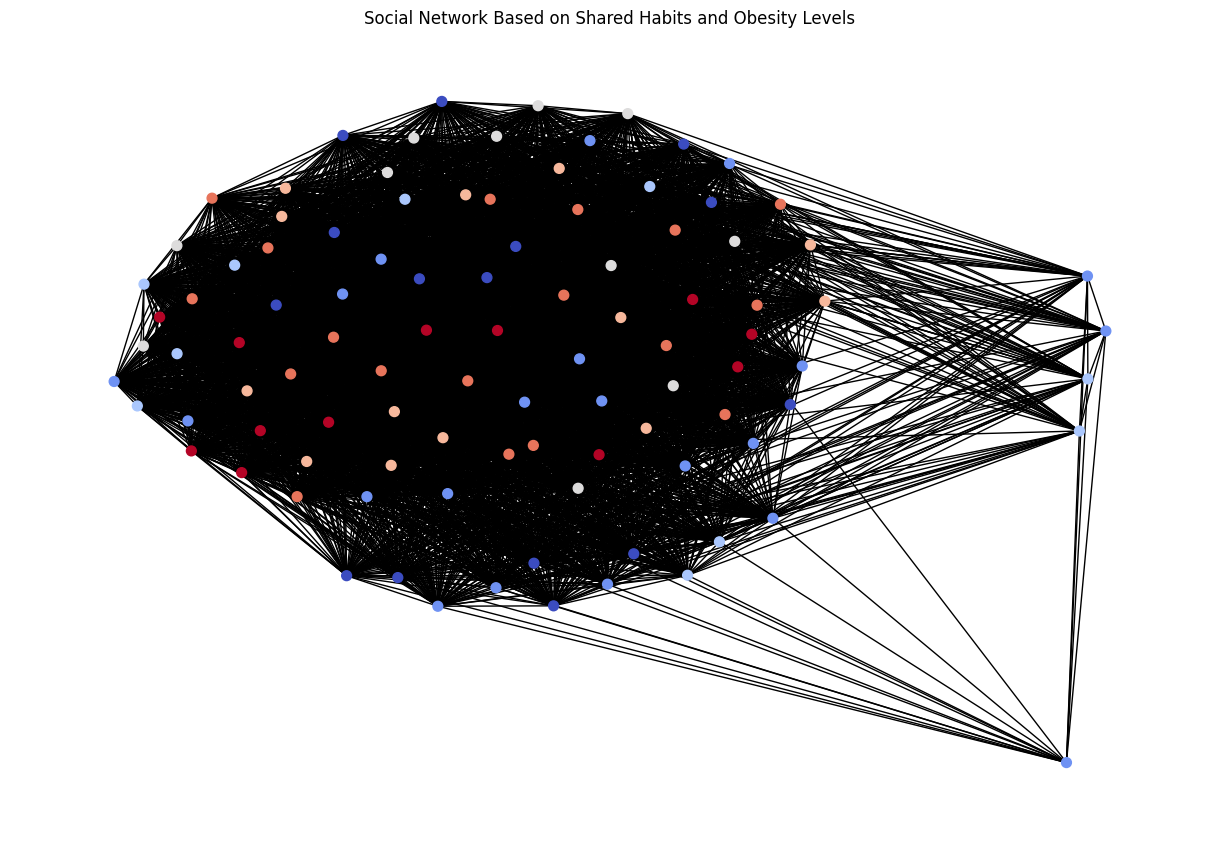

In [10]:
import networkx as nx

sample_data = obesity_data.sample(100, random_state=42)
G = nx.Graph()

for i, row in sample_data.iterrows():
    G.add_node(i, obesity_level=row['NObeyesdad'], family_history=row['family_history_with_overweight'], transport=row['MTRANS'])

for i, row_i in sample_data.iterrows():
    for j, row_j in sample_data.iterrows():
        if i != j and (row_i['family_history_with_overweight'] == row_j['family_history_with_overweight'] or row_i['MTRANS'] == row_j['MTRANS']):
            G.add_edge(i, j)

obesity_mapping = {
    "Insufficient_Weight": 0, "Normal_Weight": 1,
    "Overweight_Level_I": 2, "Overweight_Level_II": 3,
    "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6
}
for i, node_data in G.nodes(data=True):
    G.nodes[i]['obesity_numeric'] = obesity_mapping[sample_data.loc[i, 'NObeyesdad']]

plt.figure(figsize=(12, 8))
node_colors = [data['obesity_numeric'] for _, data in G.nodes(data=True)]
nx.draw(G, node_color=node_colors, cmap='coolwarm', with_labels=False, node_size=50)
plt.title('Social Network Based on Shared Habits and Obesity Levels')
plt.show()


### Insights from the Obesity Dataset and Social Network Analysis

#### Key Findings from the Dataset:
1. **Strong Correlations**:
   - Family history of being overweight shows a strong positive correlation with higher obesity levels.
   - Physical activity frequency (FAF) and water intake (CH2O) negatively correlate with obesity levels.

2. **Weak Correlations**:
   - Time using technology (TUE) and smoking habits (SMOKE) show weak relationships with obesity.

3. **Categorical Observations**:
   - Family history of overweight is a significant factor for individuals falling into higher obesity categories.
   - Transportation method indicates potential lifestyle influences, where those walking more often have lower obesity levels.

#### Social Network Analysis:
1. Nodes (individuals) were connected based on shared habits, such as:
   - Family history with overweight.
   - Preferred transportation methods.

2. **Network Visualization**:
   - Lighter-colored nodes represent lower obesity levels, while darker nodes indicate higher obesity levels.
   - Clusters of similar obesity levels suggest that social habits may influence or reflect health outcomes.

3. **Potential Applications**:
   - Identify key social groups that could benefit from targeted health interventions.
   - Use clustering and graph metrics to study the spread of health-related behaviors.

#### Recommendations:
- Use clustering techniques to identify at-risk groups within the dataset.
- Conduct further studies to explore causation between shared habits and obesity levels.
- Implement predictive models to simulate health interventions within these networks.

### Next Steps:
- Quantify clustering using graph metrics (e.g., degree centrality, modularity).
- Develop predictive models for obesity using both individual and network-level data.
